## Libraries Importing

In [1]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

## Data Loading

In [4]:
stress=pd.read_csv(filepath_or_buffer="input/Stress.csv",encoding="ISO-8859-1")

In [5]:
nonstress=pd.read_csv(filepath_or_buffer="input/Non_Stress.csv",encoding="ISO-8859-1")

## Data Preprocessing

***Stress preliminary Analysis***

In [6]:
    stress.shape

(2410, 16)

In [7]:
stress.head()

,Unnamed: 0,user,text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,0,whosalli,The lack of this understanding is a small but ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,estermnunes,i just told my parents about my depression and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,TheAlphaAries,depression is something i don't speak about ev...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,_ojhodgson,Made myself a tortilla filled with pb&j. My de...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,DMiller96371630,@WorldofOutlaws I am gonna need depression med...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
stress=stress[["text"]]

In [9]:
stress.head()

,text
0,The lack of this understanding is a small but ...
1,i just told my parents about my depression and...
2,depression is something i don't speak about ev...
3,Made myself a tortilla filled with pb&j. My de...
4,@WorldofOutlaws I am gonna need depression med...


***Non-Stress priliminary Analysis***

In [10]:
nonstress.shape

(11763, 3)

In [11]:
nonstress.head()

,Unnamed: 0,TextId,Text
0,0.0,0.0,is so sad for my APL frie...
1,1.0,0.0,I missed the New Moon trail...
2,2.0,1.0,omg its already 7:30 :O
3,3.0,0.0,.. Omgaga. Im sooo im gunna CRy. I'...
4,4.0,0.0,i think mi bf is cheating on me!!! ...


In [12]:
nonstress=nonstress[["Text"]]

In [13]:
nonstress.head()

,Text
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already 7:30 :O
3,.. Omgaga. Im sooo im gunna CRy. I'...
4,i think mi bf is cheating on me!!! ...


In [14]:
nonstress.rename(columns={"Text":"text"},inplace=True)

In [15]:
nonstress.head()

,text
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already 7:30 :O
3,.. Omgaga. Im sooo im gunna CRy. I'...
4,i think mi bf is cheating on me!!! ...


In [16]:
print(stress.shape,nonstress.shape)

(2410, 1) (11763, 1)


***Visualizations***

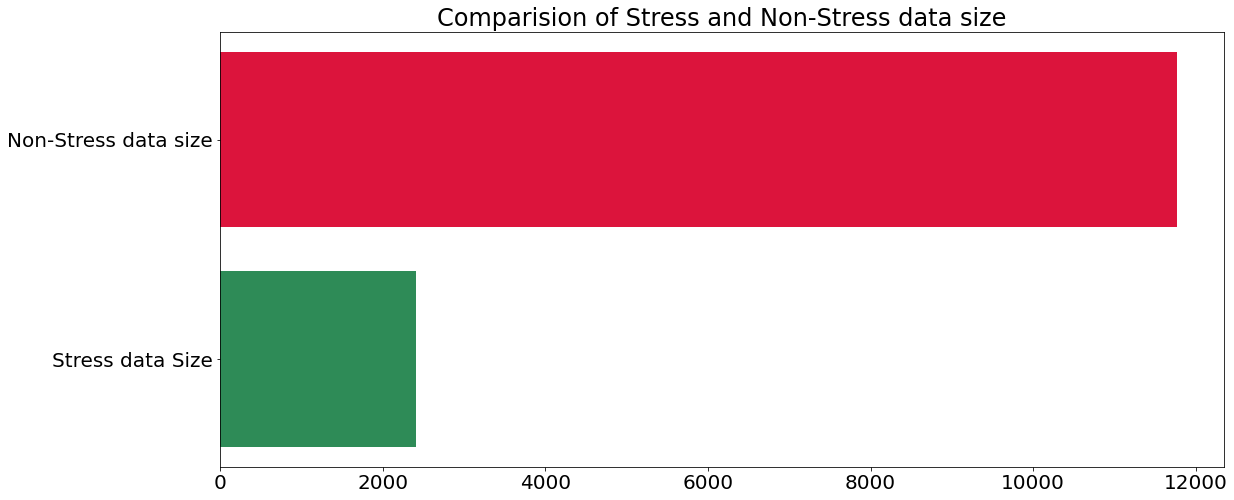

In [17]:
plt.figure(figsize=(18,8))
plt.rcParams["font.size"]=20
plt.barh(y=["Stress data Size","Non-Stress data size"],width=[stress.shape[0],nonstress.shape[0]],color=["seagreen","crimson"])
plt.title(label="Comparision of Stress and Non-Stress data size")
plt.show()

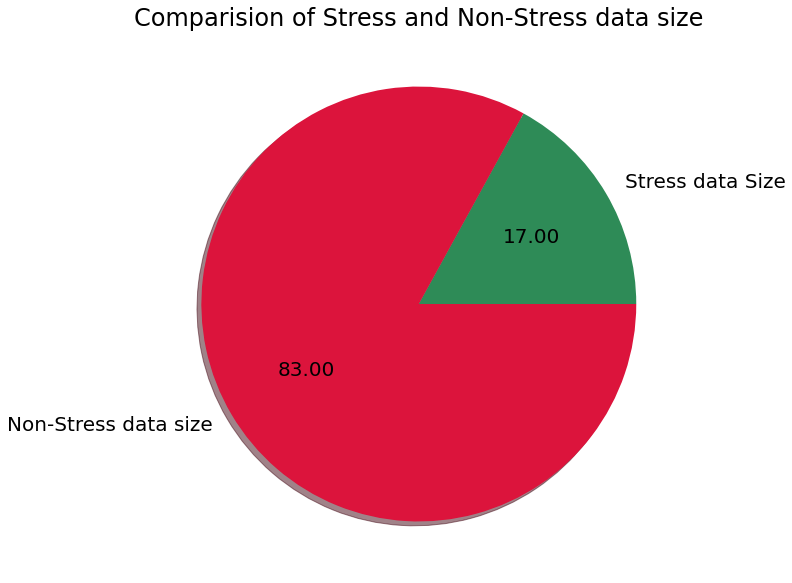

In [18]:
plt.figure(figsize=(10,10))
plt.pie(labels=["Stress data Size","Non-Stress data size"],x=[stress.shape[0],nonstress.shape[0]],colors=["seagreen","crimson"],autopct="%.2f",shadow=True)
plt.title(label="Comparision of Stress and Non-Stress data size")
plt.show()

## Label Creation

In [19]:
stress_label=np.ones(shape=stress.shape[0])
nonstress_label=np.zeros(shape=nonstress.shape[0])

In [20]:
print(stress_label.shape,nonstress_label.shape)

(2410,) (11763,)


In [21]:
print(stress_label)

[1. 1. 1. ... 1. 1. 1.]


In [22]:
print(nonstress_label)

[0. 0. 0. ... 0. 0. 0.]


In [23]:
labels=np.concatenate([stress_label,nonstress_label])

In [24]:
print(labels)

[1. 1. 1. ... 0. 0. 0.]


In [25]:
labels.shape

(14173,)

In [26]:
df=pd.concat(objs=[stress,nonstress])

In [27]:
df.shape

(14173, 1)

In [28]:
df["labels"]=labels

In [29]:
df.head()

,text,labels
0,The lack of this understanding is a small but ...,1.0
1,i just told my parents about my depression and...,1.0
2,depression is something i don't speak about ev...,1.0
3,Made myself a tortilla filled with pb&j. My de...,1.0
4,@WorldofOutlaws I am gonna need depression med...,1.0


In [30]:
df["labels"]=df["labels"].astype(dtype="int64")

In [31]:
df.head()

,text,labels
0,The lack of this understanding is a small but ...,1
1,i just told my parents about my depression and...,1
2,depression is something i don't speak about ev...,1
3,Made myself a tortilla filled with pb&j. My de...,1
4,@WorldofOutlaws I am gonna need depression med...,1


In [32]:
df.tail()

,text,labels
11758,"#wave client? Nah, just gimme telnet and a por...",0
11759,#Wayman Tisdale just went to www.waymantisdale...,0
11760,"#weather_me b67 5de, sunny, still really lovel...",0
11761,"#weather_me Helsingborg, rain, +13C, typical s...",0
11762,#websoup pleeeeeease...i missed the turtles ev...,0


In [33]:
df.isnull().sum()

text      262
labels      0
dtype: int64

In [34]:
df.duplicated().sum()

287

In [35]:
df=df.dropna().drop_duplicates(subset=["text","labels"],keep="first").reset_index(drop=True)

In [36]:
df.shape

(13884, 2)

In [37]:
df["labels"].value_counts()

0    11584
1     2300
Name: labels, dtype: int64

In [38]:
val_1=df[df["labels"]==1]
val_0=df[df["labels"]==0][:2300]

In [39]:
print(val_1.shape,val_0.shape)

(2300, 2) (2300, 2)


In [40]:
df=pd.concat(objs=[val_1,val_0],ignore_index=True)

In [41]:
df.shape

(4600, 2)

In [42]:
df.head()

,text,labels
0,The lack of this understanding is a small but ...,1
1,i just told my parents about my depression and...,1
2,depression is something i don't speak about ev...,1
3,Made myself a tortilla filled with pb&j. My de...,1
4,@WorldofOutlaws I am gonna need depression med...,1


In [43]:
df.tail()

,text,labels
4595,he makes me so happy!,0
4596,he makes my little heart smile,0
4597,he never call me&gt;_&lt; i'll come psh yeah ...,0
4598,He wasn't able to stay the whole night. He h...,0
4599,headache.,0


In [44]:
df=df.sample(frac=1).reset_index(drop=True)

In [45]:
df.head(10)

,text,labels
0,[New Blog Post] This past week I was invited t...,1
1,@YonkouProd Lots of depression in this thread.,1
2,i measure my depression by the amount of my ex...,1
3,I want to go to the Teen Choice Awards!,0
4,Only did it to set up an event for my birthday...,1
5,my anxiety and my depression fighting over who...,1
6,he makes me so happy!,0
7,I just heard David Eddings died earlier this ...,0
8,am i losing my mind cause i wanna see my.TC o...,0
9,i miss the days when i was the starfish to hi...,0


## Data Cleaning

In [46]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
stopwords=set(STOP_WORDS)
from spacy.lang.en import English
parser=English()

In [47]:
import string
punctuations=string.punctuation

In [48]:
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [49]:
spacy.__version__

'3.3.0'

In [50]:
nlp=spacy.load("en_core_web_sm")

In [51]:
def preprocess_text(docx):
    sentence=parser(docx)
    sentence=[word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in sentence]
    sentence=[word for word in sentence if word not in stopwords and word not in punctuations]
    sentence=[word for word in sentence if len(word)>1 and word.isalpha()]
    return sentence

In [52]:
sentences=[]
for sentes in df["text"]:
    sp_sentes=nlp(text=sentes)
    cleaned=preprocess_text(sp_sentes)
    sentences.append(cleaned)

In [53]:
for sents in sentences[:10]:
    print(sents,"\n\n")

['new', 'blog', 'post', 'past', 'week', 'invite', 'speak', 'group', 'tool', 'use', 'cope', 'depression', 'strategy', 'share', 'mentalhealth', 'toolkit', 'tinyhabit', 'recovery'] 


['lot', 'depression', 'thread'] 


['measure', 'depression', 'ex', 'tshirt', 'able', 'wear', 'week'] 


['want', 'teen', 'choice', 'awards'] 


['set', 'event', 'birthday', 'man', 'facebook', 'main', 'trigger', 'depression', 'try', 'stay', 'positive', 'cut', 'social', 'medium', 'big'] 


['anxiety', 'depression', 'fight', 'day'] 


['happy'] 


['hear', 'david', 'eddings', 'die', 'early', 'month'] 


['lose', 'mind', 'cause', 'wanna', 'tc', 'tv', 'right', 'min', 'want', 'candygirl', 'daisy'] 


['miss', 'day', 'starfish', 'sponge'] 




## Text Data into Numerical Data Convertion

In [54]:
tok=Tokenizer()
tok.fit_on_texts(sentences)

In [55]:
vocab_size=len(tok.word_index)+1
print(vocab_size)

7877


In [56]:
encd_text=tok.texts_to_sequences(sentences)

In [57]:
print(encd_text)

[[29, 354, 52, 251, 53, 1541, 222, 512, 1051, 54, 397, 1, 2035, 173, 71, 3095, 3096, 315], [50, 1, 775], [3097, 1, 916, 3098, 231, 693, 53], [9, 252, 563, 2036], [373, 917, 513, 85, 466, 918, 398, 1, 27, 164, 316, 193, 204, 184, 139], [2, 1, 115, 4], [30], [140, 776, 1542, 101, 212, 141], [47, 194, 33, 83, 3099, 355, 40, 1052, 9, 3100, 3101], [25, 4, 3102, 2037], [1053, 122, 58, 108, 40], [30, 245, 10, 694], [3, 174, 2038, 45, 1, 1248, 626], [356, 336, 1, 2039, 514, 116, 3103, 6, 919, 3104, 3105, 337, 1249, 3106, 336, 1, 2039, 317], [31, 3107, 3108, 2040, 205, 9, 279, 1, 41], [3109, 1543, 3110, 1], [11, 3111, 3112, 1054, 4, 72], [374, 2041, 515, 1055, 1056, 165, 14, 42, 54, 1, 246, 33, 425, 185, 31, 318, 1250, 186], [36, 338, 317, 26, 2042, 1544, 1, 777, 778, 6, 36], [29, 2043, 3113, 3114, 13, 1], [55, 62, 3115, 1, 2044, 627], [280, 1, 232, 779, 17, 3116, 15, 67, 300, 10, 26], [695, 2045, 3117, 166], [516, 42], [140, 696, 339, 1, 2], [1, 2, 154, 77, 15], [780, 375, 35, 96, 1057, 781, 9

In [58]:
tok.word_index.items()

dict_items([('depression', 1), ('anxiety', 2), ('like', 3), ('day', 4), ('feel', 5), ('know', 6), ('good', 7), ('emoji', 8), ('want', 9), ('time', 10), ('think', 11), ('people', 12), ('love', 13), ('face', 14), ('work', 15), ('help', 16), ('life', 17), ('today', 18), ('thing', 19), ('bad', 20), ('need', 21), ('come', 22), ('great', 23), ('mental', 24), ('miss', 25), ('sleep', 26), ('try', 27), ('cry', 28), ('new', 29), ('happy', 30), ('year', 31), ('friend', 32), ('cause', 33), ('talk', 34), ('night', 35), ('health', 36), ('hate', 37), ('find', 38), ('sad', 39), ('right', 40), ('leave', 41), ('tell', 42), ('way', 43), ('lol', 44), ('cure', 45), ('look', 46), ('lose', 47), ('stress', 48), ('let', 49), ('lot', 50), ('twitter', 51), ('post', 52), ('week', 53), ('use', 54), ('hope', 55), ('watch', 56), ('suffer', 57), ('eat', 58), ('home', 59), ('fuck', 60), ('amp', 61), ('real', 62), ('start', 63), ('hard', 64), ('thank', 65), ('heart', 66), ('wish', 67), ('tomorrow', 68), ('smile', 69), 

In [59]:
import pickle
with open(file="model/tokens.pkl",mode="wb") as file:
    pickle.dump(obj=tok,file=file)

In [60]:
pad_text=pad_sequences(sequences=encd_text,maxlen=53,padding="post")

In [61]:
print(pad_text)

[[  29  354   52 ...    0    0    0]
 [  50    1  775 ...    0    0    0]
 [3097    1  916 ...    0    0    0]
 ...
 [7868 7869 1329 ...    0    0    0]
 [7874   11  211 ...    0    0    0]
 [7875 7876    0 ...    0    0    0]]


In [62]:
y=df["labels"]

    ## Data Splitting

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [64]:
x_train,x_test,y_train,y_test=train_test_split(pad_text,y,test_size=0.2,random_state=42)

## Model-1 RandomForestClassifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=600)

In [66]:
RF_model = clf.fit(x_train,y_train)

In [67]:
y_pred_RF=RF_model.predict(x_test)

In [68]:
print(y_pred_RF)

[0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0
 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0
 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1
 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0
 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1
 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1
 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1
 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0
 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1
 1 1 1 0 0 0 1 1 0 0 0 0 

## Result Analysis

### Accuracy Score

In [69]:
RF_Accuracy=accuracy_score(y_test,y_pred_RF)
print(RF_Accuracy)

0.9554347826086956


### Classification Report

In [70]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       465
           1       0.95      0.96      0.96       455

    accuracy                           0.96       920
   macro avg       0.96      0.96      0.96       920
weighted avg       0.96      0.96      0.96       920



### Confusion Matrix

In [71]:
labels=["Not_Stress","Stress"]

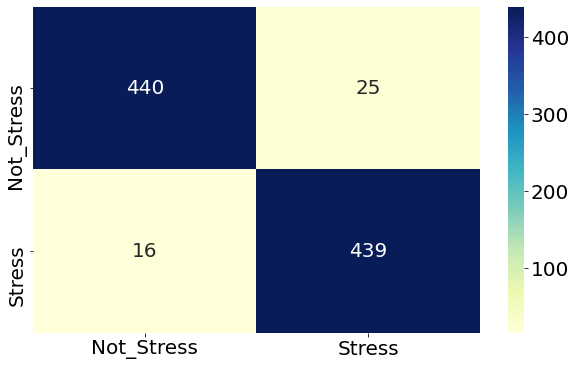

In [72]:
plt.rcParams["figure.figsize"]=(10,6)
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=y_pred_RF),annot=True,fmt="d",cmap="YlGnBu",xticklabels=labels,yticklabels=labels)
plt.show()

## Model Saving

In [73]:
import pickle
pickle.dump(RF_model, open('model/RF_model.pkl', 'wb'))

## Model-2 SupportVectorClassifier

In [74]:
from sklearn.svm import SVC

In [75]:
svm = SVC()

In [76]:
SVM_model = svm.fit(x_train,y_train)

In [77]:
y_pred_SVM =SVM_model.predict(x_test)

In [78]:
print(y_pred_SVM)

[0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1
 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 1 1 0 1 0 0 0 1 0 0 0 1 

## Result Analysis

### Accuracy Score

In [79]:
SVM_Accuracy=accuracy_score(y_test,y_pred_SVM)
print(SVM_Accuracy)

0.6804347826086956


### Classification Report

In [80]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.63      0.88      0.73       465
           1       0.79      0.48      0.60       455

    accuracy                           0.68       920
   macro avg       0.71      0.68      0.67       920
weighted avg       0.71      0.68      0.67       920



### Confusion Matrix

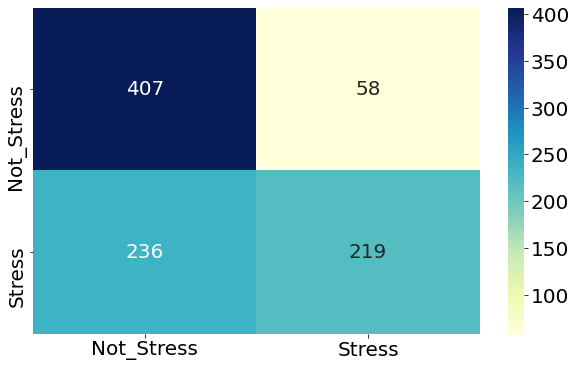

In [81]:
plt.rcParams["figure.figsize"]=(10,6)
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=y_pred_SVM),annot=True,fmt="d",cmap="YlGnBu",xticklabels=labels,yticklabels=labels)
plt.show()

## Model Saving

In [82]:
pickle.dump(SVM_model, open('model/SVM_Model.pkl', 'wb'))

## Model-3 AdaBoostClassifier

In [83]:
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier(n_estimators=600)
ABC.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=600)

In [84]:
ABC_pred=ABC.predict(x_test)

In [85]:
print(ABC_pred)

[0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0
 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0
 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1
 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0
 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1
 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0
 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1
 1 1 1 0 0 0 1 1 0 0 0 0 

## Result Analysis

### Accuracy Score

In [86]:
ABC_Accuracy=accuracy_score(y_test,ABC_pred)
print(ABC_Accuracy)

0.9652173913043478


### Classification Report

In [87]:
print(classification_report(y_test, ABC_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       465
           1       0.98      0.95      0.96       455

    accuracy                           0.97       920
   macro avg       0.97      0.97      0.97       920
weighted avg       0.97      0.97      0.97       920



### Confusion Matrix

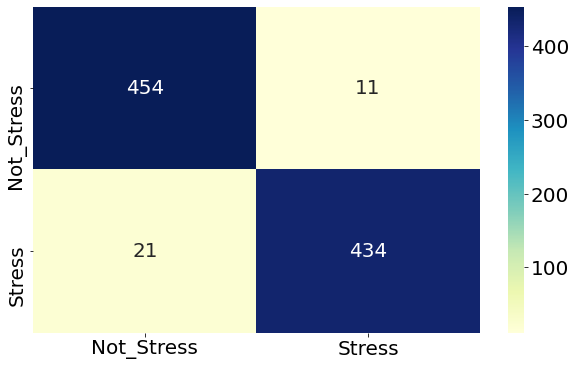

In [88]:
plt.rcParams["figure.figsize"]=(10,6)
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=ABC_pred),annot=True,fmt="d",cmap="YlGnBu",xticklabels=labels,yticklabels=labels)
plt.show()

In [89]:
with open(file="model/ABC_model.pkl",mode="wb") as file:
    pickle.dump(obj=ABC,file=file)

## Accuracy Comparision

In [90]:
Labels = ['RFC', 'SVC','ABC']
Accuracies = [RF_Accuracy, SVM_Accuracy,ABC_Accuracy]

[0.9554347826086956, 0.6804347826086956, 0.9652173913043478]


<AxesSubplot:>

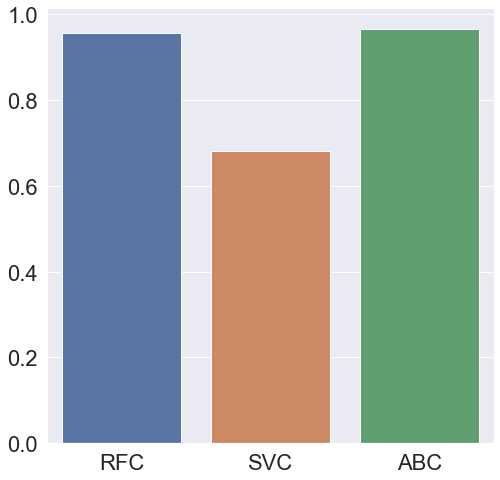

In [107]:
print(Accuracies)
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(font_scale = 2)
sns.barplot(x=Labels, y=Accuracies)

#thank you